In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Detailed-Sales-Report.csv')
df

,SNO,DATE,INVOICE_NO,CLIENT,PRODUCT,PRODUCT_CODE,QUANTITY,RATE,DISCOUNT,TAXABLE,TAX,AMOUNT_AFTER_TAX
0,1,11-08-2023,INV11,Ashiq,Maaza big,NaN,1,20,0,20,0,20
1,2,11-08-2023,INV11,Ashiq,Watermelon Juice,1.0,2,40,0,80,0,80
2,3,11-08-2023,INV12,Ashiq,Maaza big,NaN,1,20,0,20,0,20
3,4,11-08-2023,INV13,Ashiq,Muskmelon Juice,2.0,3,40,0,120,0,120
4,5,11-08-2023,INV13,Ashiq,Chocolate milkshake,NaN,1,75,0,75,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...
3374,3375,08-09-2023,INV2260,Swetha,Rose milk,NaN,1,45,0,45,0,45
3375,3376,08-09-2023,INV2260,Swetha,Musambi juice,NaN,1,50,0,50,0,50
3376,3377,08-09-2023,INV2261,Akshitha,Rose milk,NaN,3,45,0,135,0,135
3377,3378,08-09-2023,INV2262,Moshika,Bread omlette,NaN,1,60,0,60,0,60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3379 entries, 0 to 3378
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SNO               3379 non-null   int64  
 1   DATE              3379 non-null   object 
 2   INVOICE_NO        3379 non-null   object 
 3   CLIENT            3379 non-null   object 
 4   PRODUCT           3379 non-null   object 
 5   PRODUCT_CODE      595 non-null    float64
 6   QUANTITY          3379 non-null   int64  
 7   RATE              3379 non-null   int64  
 8   DISCOUNT          3379 non-null   int64  
 9   TAXABLE           3379 non-null   int64  
 10  TAX               3379 non-null   int64  
 11  AMOUNT_AFTER_TAX  3379 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 316.9+ KB


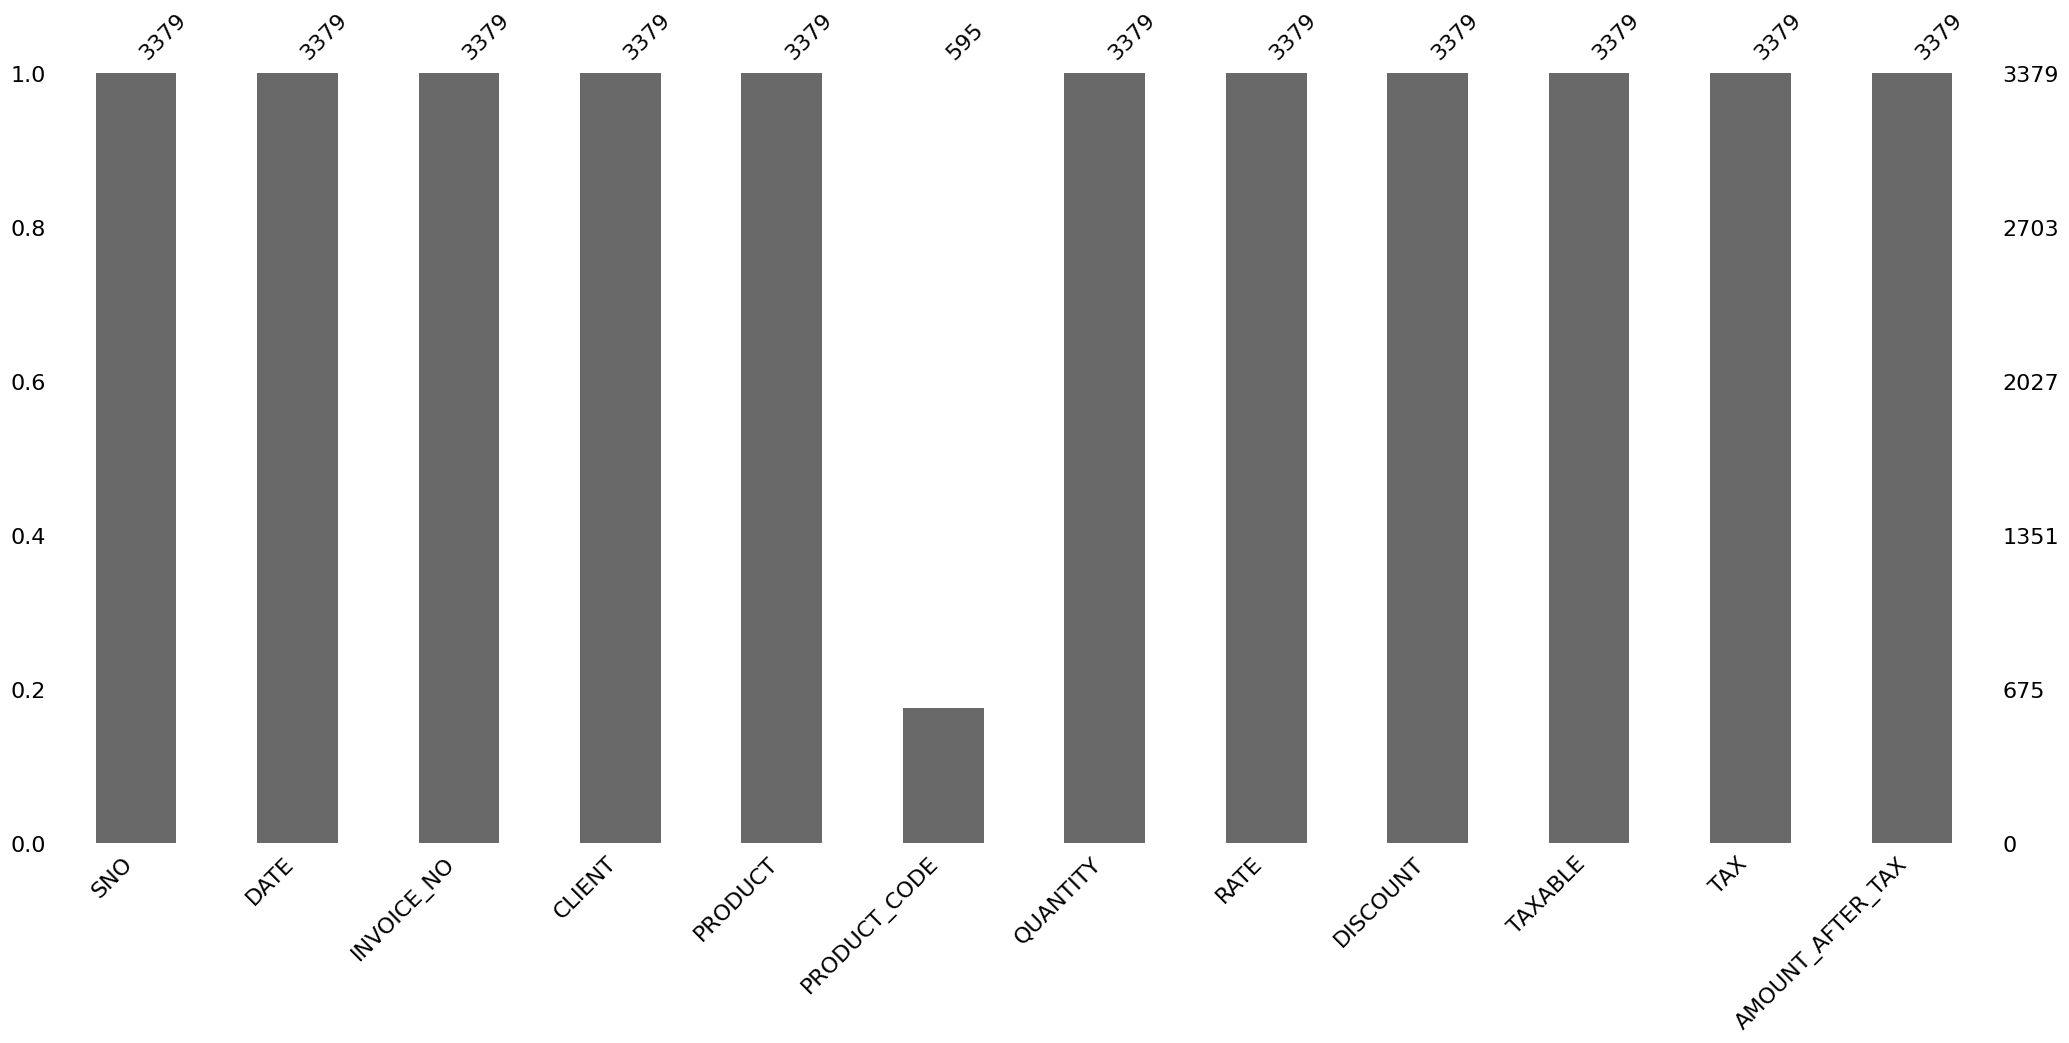

In [ ]:
import missingno  as msno
msno.bar(df)
plt.show()

In [ ]:
df=df.drop('PRODUCT_CODE',axis=1)

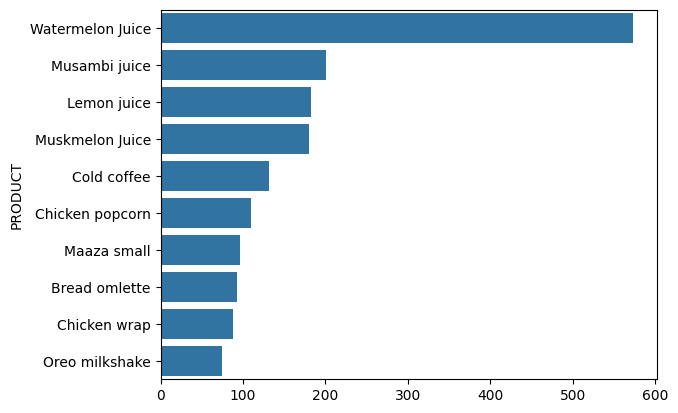

In [ ]:
top_1=df.groupby('PRODUCT')['QUANTITY'].sum().nlargest(10)
sns.barplot(x=top_1.values,y=top_1.index)
plt.show()

In [ ]:
top_1

PRODUCT
Watermelon Juice    573
Musambi juice       201
Lemon juice         182
Muskmelon Juice     180
Cold coffee         132
Chicken popcorn     110
Maaza small          96
Bread omlette        93
Chicken wrap         88
Oreo milkshake       75
Name: QUANTITY, dtype: int64

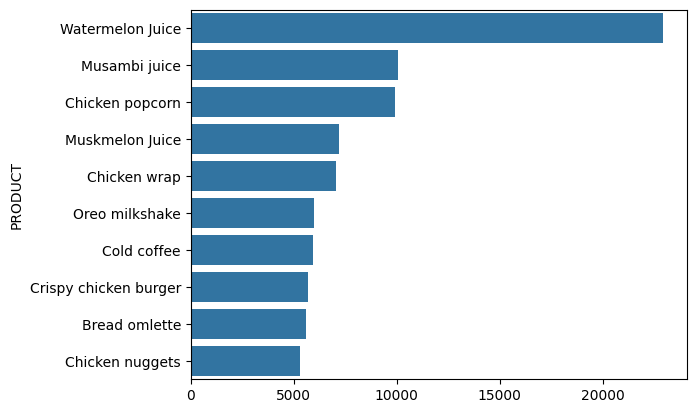

In [ ]:
top_2=df.groupby('PRODUCT')['AMOUNT_AFTER_TAX'].sum().nlargest(10)
sns.barplot(x=top_2.values,y=top_2.index)
plt.show()

In [ ]:
aov=df['AMOUNT_AFTER_TAX'].sum()/df['INVOICE_NO'].nunique()
aov

97.52268602540835

In [ ]:
top_3= df[df['PRODUCT']=='Chicken momos']
t_3 = top_3.groupby('PRODUCT').agg({'QUANTITY': lambda x: x.sum(),
                                    'AMOUNT_AFTER_TAX': lambda x:x.sum()})
t_3

,QUANTITY,AMOUNT_AFTER_TAX
PRODUCT,,
Chicken momos,32,2880


In [ ]:
top_4= df[df['CLIENT']=='Reshma']['AMOUNT_AFTER_TAX'].sum()
top_4

460

In [ ]:
top_5= df[(df['CLIENT']=='Pooja') & (df['PRODUCT']=='Muskmelon Juice')]
top_5

,SNO,DATE,INVOICE_NO,CLIENT,PRODUCT,QUANTITY,RATE,DISCOUNT,TAXABLE,TAX,AMOUNT_AFTER_TAX
2874,2875,05-09-2023,INV1923,Pooja,Muskmelon Juice,1,40,0,40,0,40


In [ ]:
top_6= df[df['PRODUCT']=='Cotton Candy']['AMOUNT_AFTER_TAX'].sum()
top_6

210

In [ ]:
top_7=df[df['INVOICE_NO']=='INV993']
top_7['CLIENT'].unique()


array(['Monika'], dtype=object)

In [ ]:
top_8=df[df['CLIENT']=='Ashiq']
top_8['INVOICE_NO'].nunique()

878

In [ ]:
top_9=df['DISCOUNT'].nlargest(5)
top_9

0    0
1    0
2    0
3    0
4    0
Name: DISCOUNT, dtype: int64

In [ ]:
top_10=df[(df['PRODUCT']=='Muskmelon Juice') | (df['PRODUCT']=='Watermelon Juice')]
top_10['INVOICE_NO'].nunique()

531